<a href="https://colab.research.google.com/github/ducviet00/Data-Science-DevC-2020/blob/master/Lab_2_Pandas_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [4]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [7]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [8]:
# Your code here
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [9]:
# Your code here
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
42,13.94,3.06,Male,No,Sun,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
189,23.10,4.00,Male,Yes,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [12]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [13]:
# Your code here
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [17]:
# Your code here
tips.max()

total_bill    50.81
tip              10
sex            Male
smoker          Yes
day            Thur
time          Lunch
size              6
dtype: object

In [16]:
tips.min()

total_bill      3.07
tip                1
sex           Female
smoker            No
day              Fri
time          Dinner
size               1
dtype: object

**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [26]:
# Your code here
print(tips.day.unique())

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


**List of unique values in column `time`**

In [28]:
# Your code here
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [31]:
# Your code here
tips.size.shape

()

**How many man/woman paid for the dish?**


In [ ]:
# Your code here

**What is the percentage of smoker table and their revenue?**

In [ ]:
# Your code here

**List 3 tables that have the most expensive bill**

In [ ]:
# Your code here

### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [32]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [33]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
# Your code here
tips2 = tips.groupby('smoker').sum()
tips2['tip/person'] = tips2['tip']/tips2['size']
tips2['bill/person'] = tips2['total_bill']/tips2['size']

In [45]:
tips2

,total_bill,tip,size,tip/person,bill/person
smoker,,,,,
Yes,1930.34,279.81,224,1.249152,8.617589
No,2897.43,451.77,403,1.121017,7.189653


In [51]:
print("Who eats more? Smoker:", tips2.index[tips2['bill/person'].argmax()])
print("Who tips more? Smoker:", tips2.index[tips2['tip/person'].argmax()])

Who eats more? Smoker: Yes
Who tips more? Smoker: Yes


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

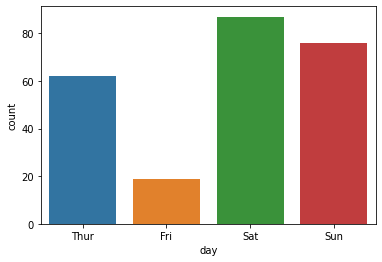

In [58]:
# Your code here
sns.countplot(x=tips['day'], data=tips)

**Visualize # of smoker and non-smoker tables**

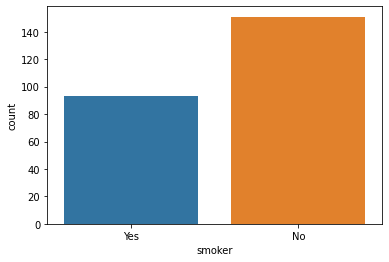

In [59]:
# Your code here
sns.countplot(x='smoker', data=tips)

**Visualize # of male/female customers who pay**

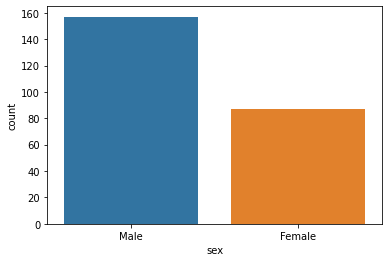

In [61]:
# Your code here
sns.countplot(x='sex', data=tips)

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

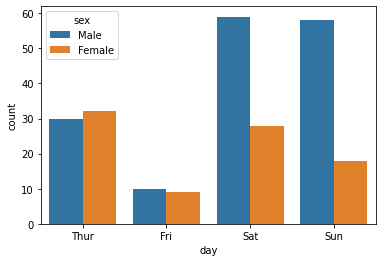

In [63]:
# Your code here
sns.countplot(x='day', hue='sex', data=tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

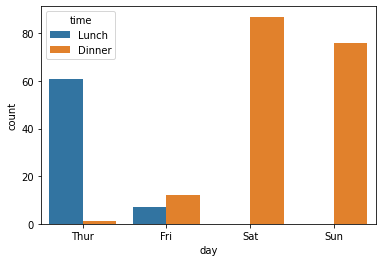

In [65]:
# Your code here
sns.countplot(x='day', hue='time', data=tips)

**Example: Visualize the distribution of the total bill**


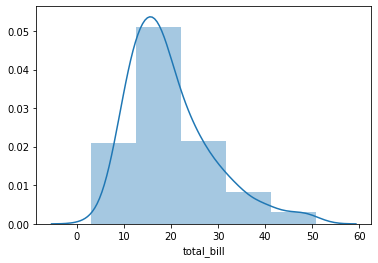

In [66]:
sns.distplot(tips['total_bill'], bins=5)

**Visualize the distribution of the tip**

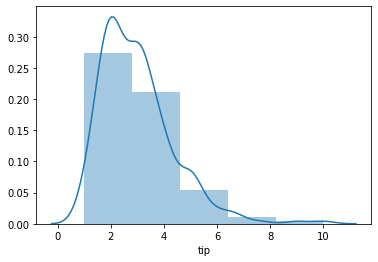

In [67]:
# Your code here
sns.distplot(tips['tip'], bins=5)

**Example: Scatter plot of tip and total bill**

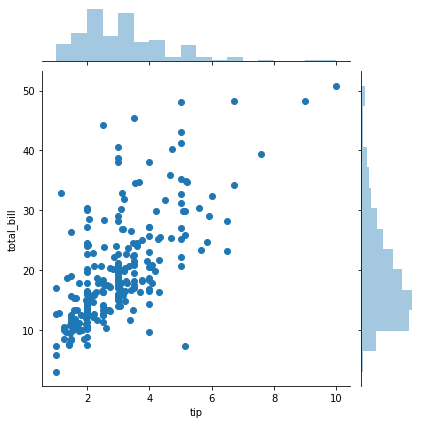

In [68]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

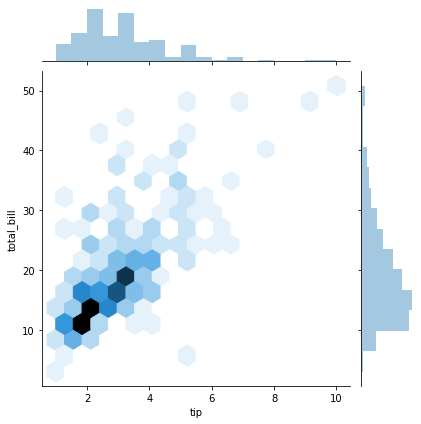

In [70]:
# Your code here
sns.jointplot(x='tip', y='total_bill', kind='hex', data=tips)

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

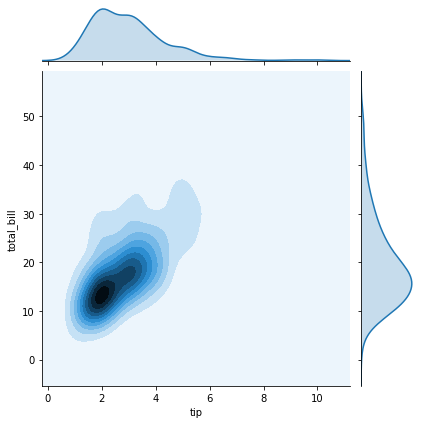

In [71]:
# Your code here
sns.jointplot(x='tip', y='total_bill', kind='kde', data=tips)

**Analyze the relationship between `size` and `tip`**

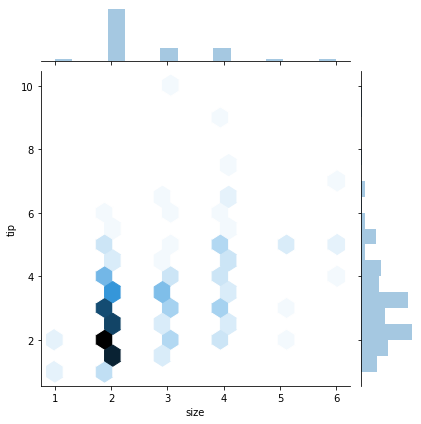

In [89]:
# Your code here
# Your code here
sns.jointplot(x='size', y='tip', kind='hex', data=tips)

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

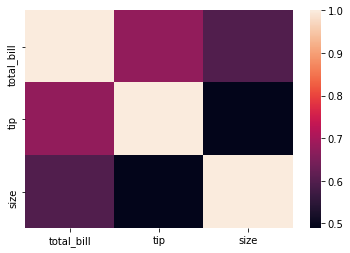

In [86]:
# Your code here
sns.heatmap(tips.corr())

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

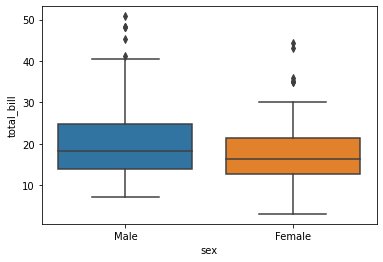

In [91]:
# Your code here
sns.boxplot(x='sex', y='total_bill', data=tips)

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

In [ ]:
# Your code here

**Add `hue='smoker'` to the previous `boxplot()`**

In [ ]:
# Your code here

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

In [ ]:
# Your code here

**Implement previous chart with `violinplot()`**

In [ ]:
# Your code here

### Bonus

**Total revenue per day**

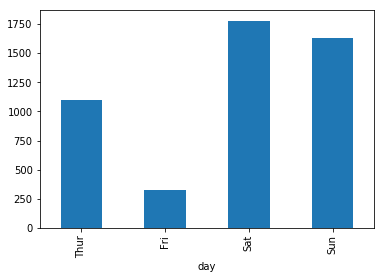

In [ ]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

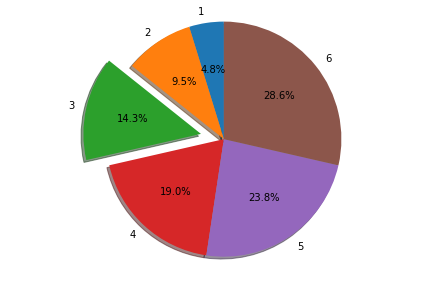

In [ ]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Great Job!!